In [1]:
import pandas as pd

df_bp = pd.read_excel("X_bp.xlsx")
df_nup = pd.read_excel("X_nup.xlsx")

In [2]:
df = df_bp.merge(df_nup, left_index=True, right_index=True, how="inner")

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

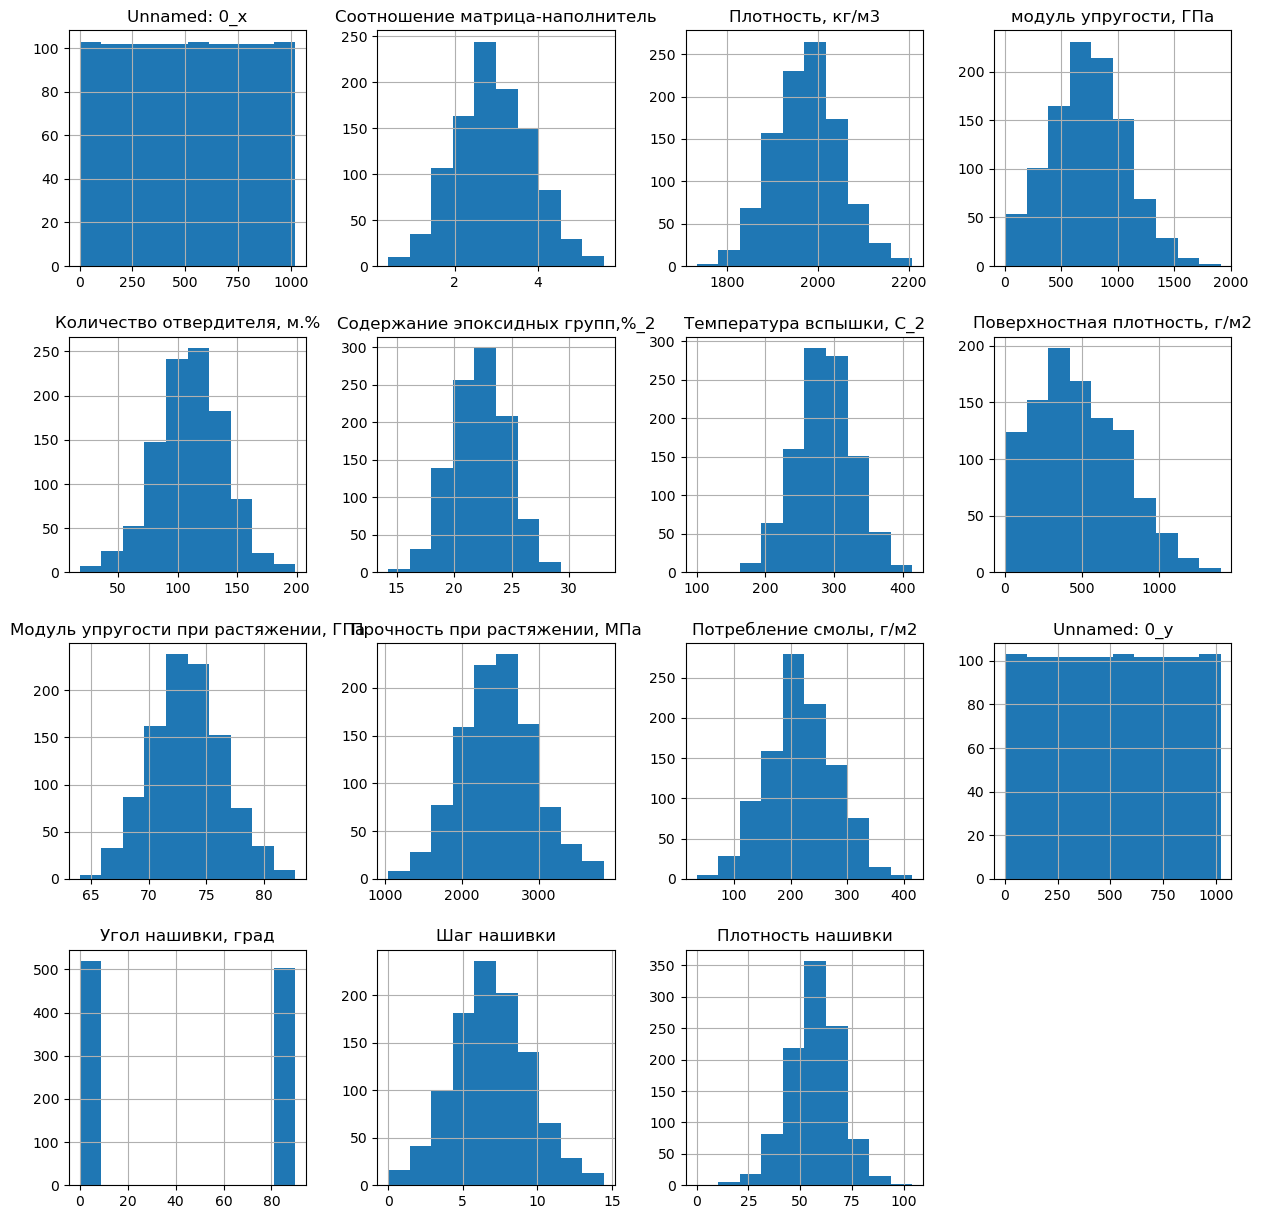

In [4]:
# Гистограммы
df.hist(figsize=(15, 15))
plt.show()

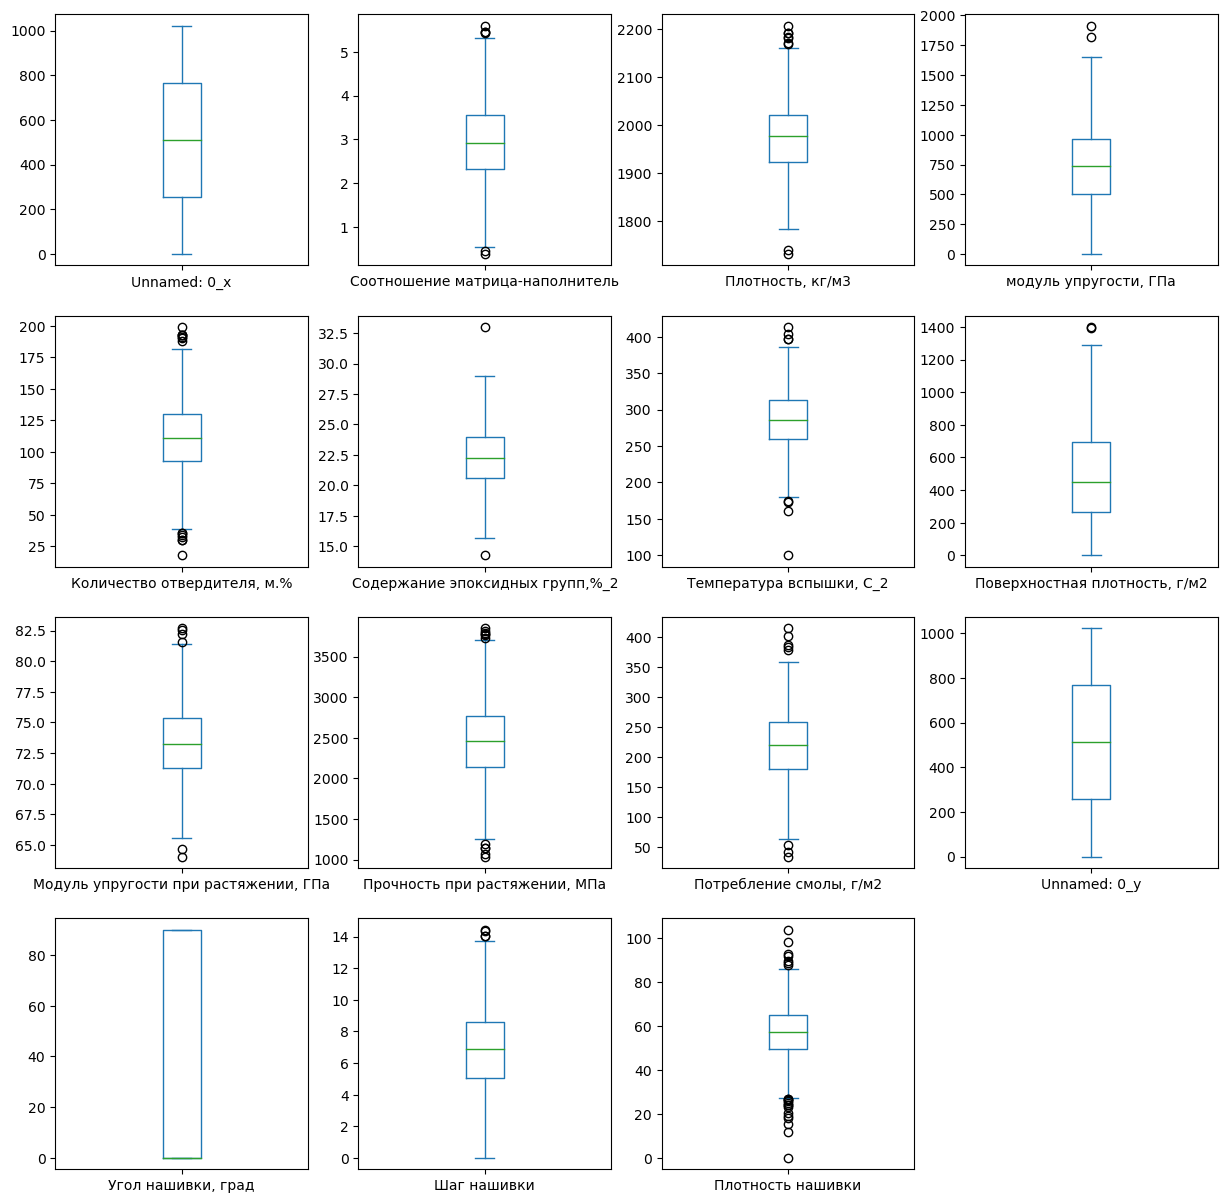

In [5]:
# Диаграммы ящика с усами
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 15))
plt.show()

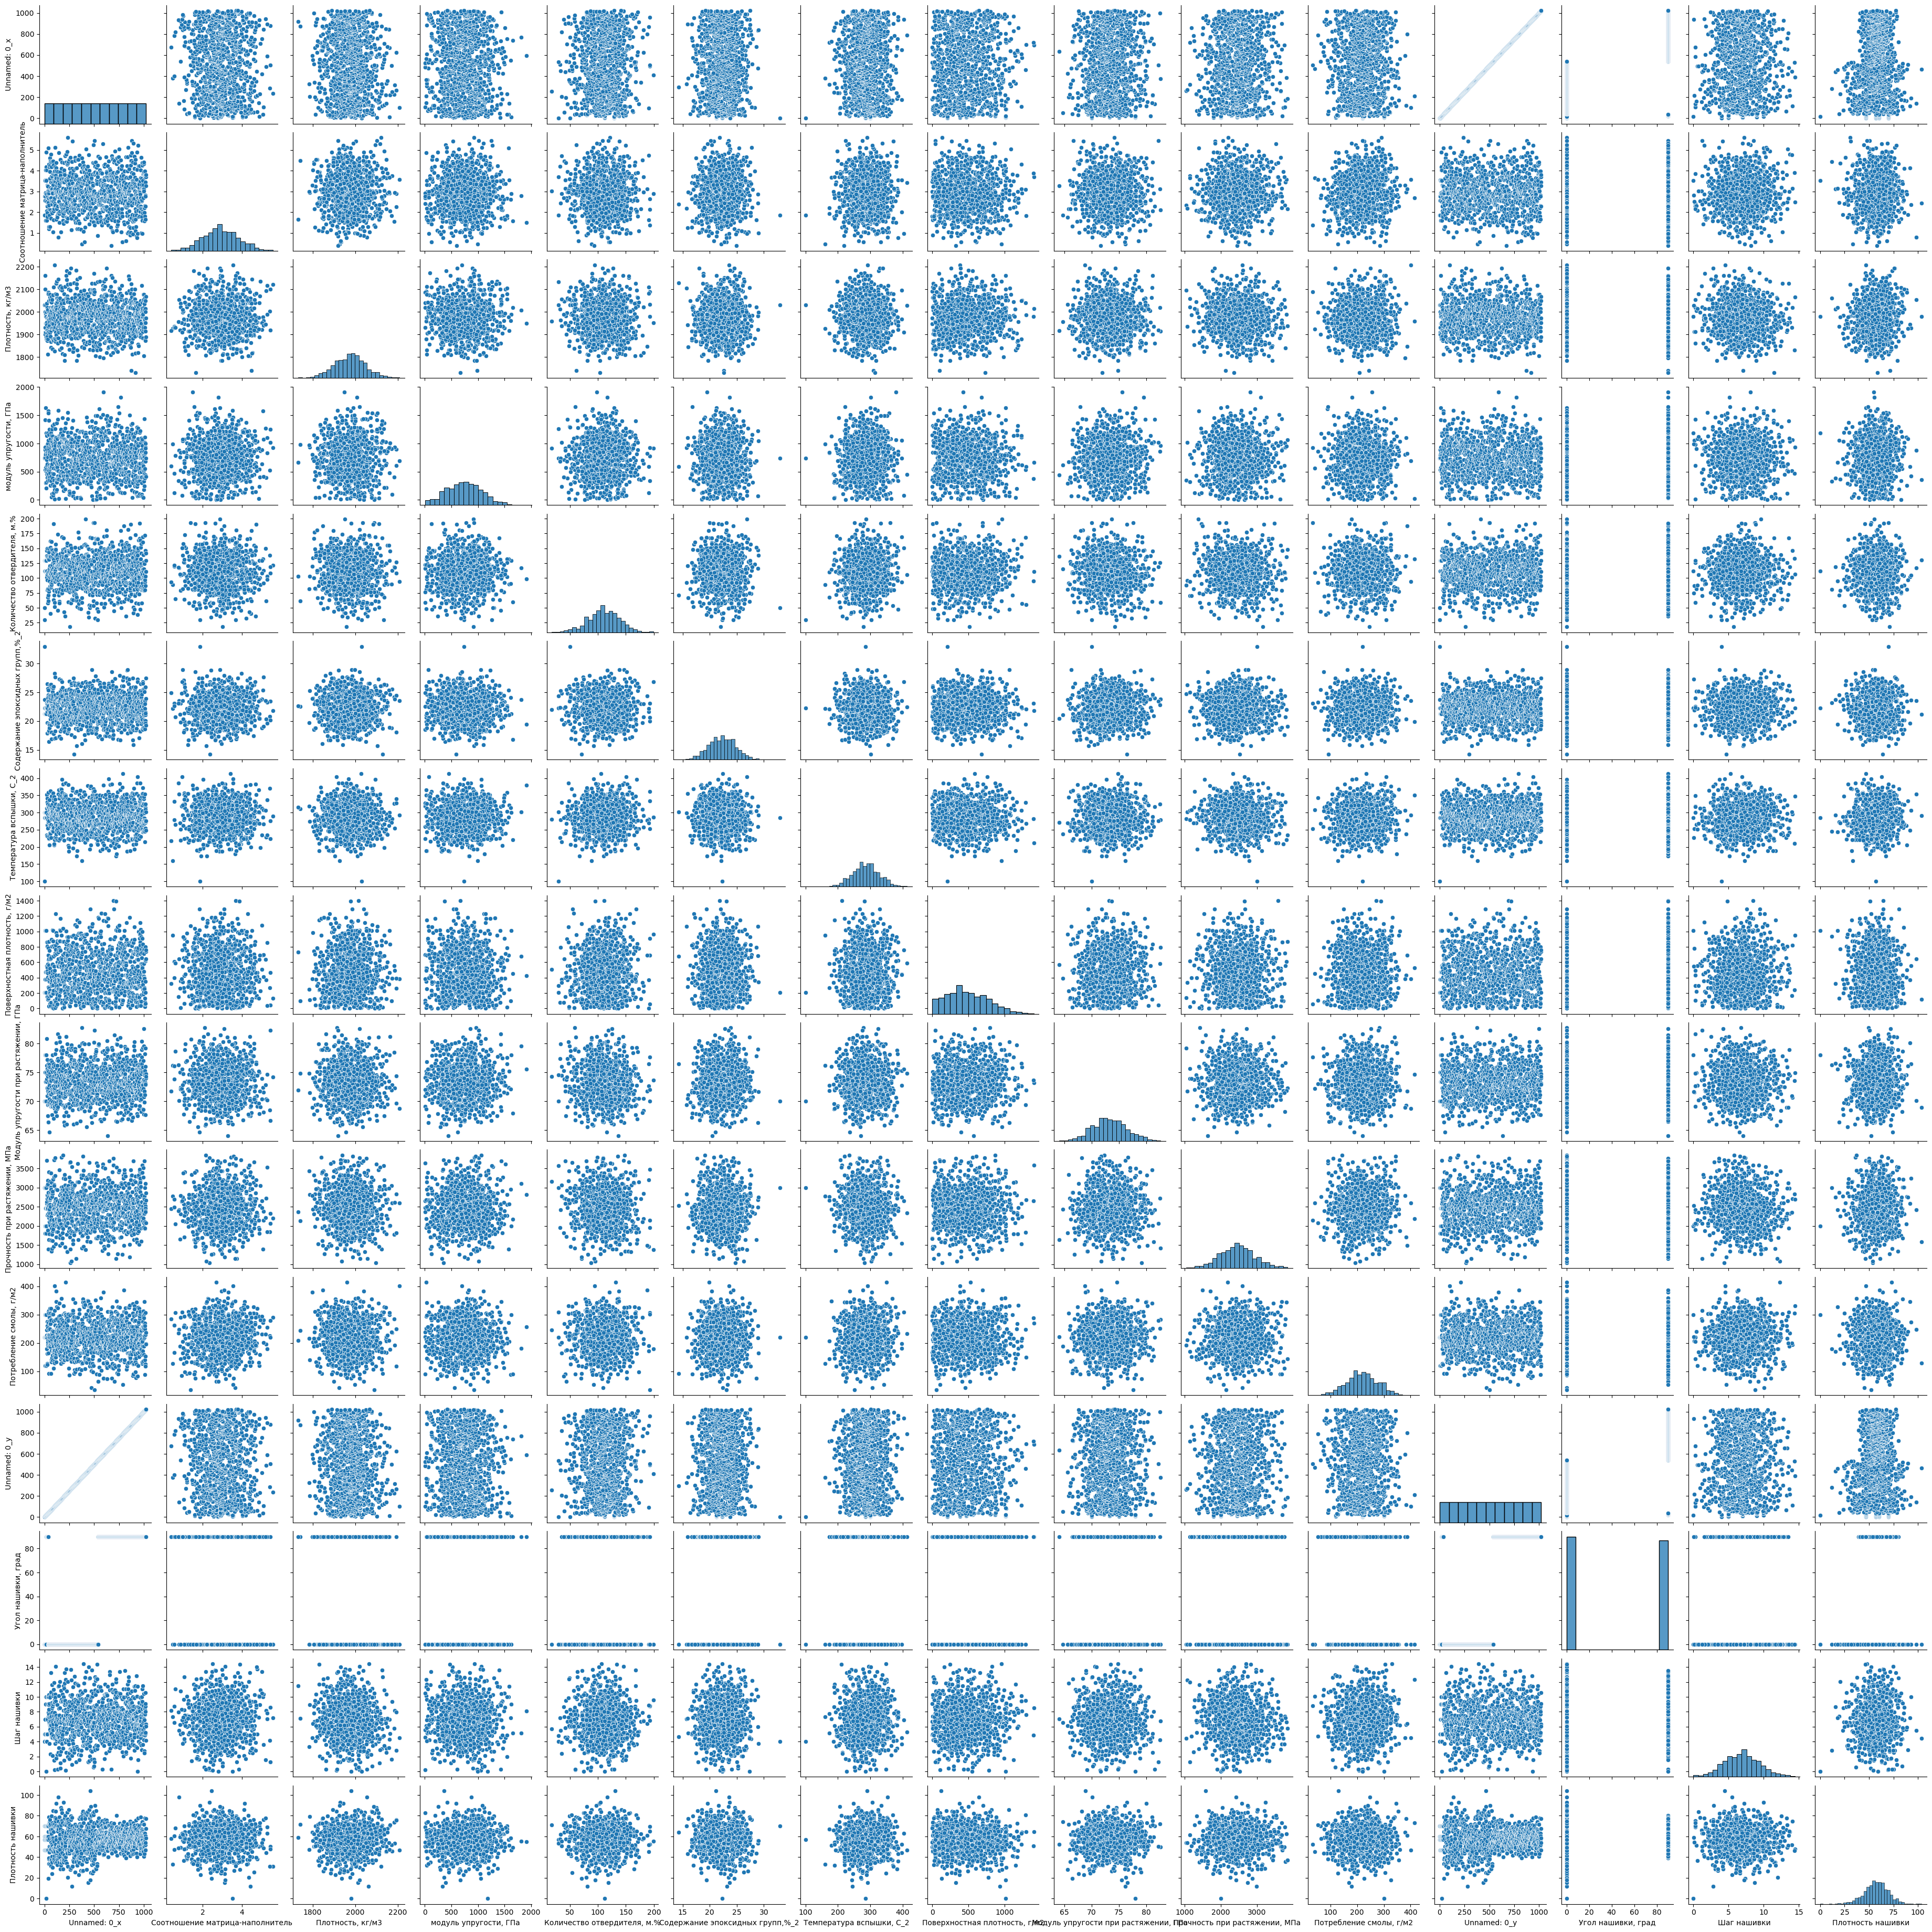

In [6]:
# Попарные графики рассеяния точек
sns.pairplot(df)
plt.show()

In [7]:
# Расчет статистических показателей
df.describe()

Unnamed: 0_x  Соотношение матрица-наполнитель  Плотность, кг/м3  \
count   1023.000000                      1023.000000       1023.000000   
mean     511.000000                         2.930366       1975.734888   
std      295.458965                         0.913222         73.729231   
min        0.000000                         0.389403       1731.764635   
25%      255.500000                         2.317887       1924.155467   
50%      511.000000                         2.906878       1977.621657   
75%      766.500000                         3.552660       2021.374375   
max     1022.000000                         5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  Unnamed: 0_y  \
count                    1023.000000              1023.000000   1023.000000   
mean                     2466.922843               218.423144    511.000000   
std                       485.628006                59.735931    295.458965   
min                      1036.856605                33.803026      0.000000   
25%                      2135.850448               179.627520    255.500000   
50%                      2459.524526               219.198882    511.000000   
75%                      2767.193119               257.481724    766.500000   
max                      3848.436732               414.590628   1022.000000   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1023.000000  1023.000000        1023.000000  
mean            44.252199     6.899222          57.153929  
std             45.015793     2.563467          12.350969  
min              0.000000     0.000000           0.000000  
25%              0.000000     5.080033          49.799212  
50%              0.000000     6.916144          57.341920  
75%             90.000000     8.586293          64.944961  
max             90.000000    14.440522         103.988901

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [10]:
# Разделение данных
X = df.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)
y = df[['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [13]:
from joblib import dump

In [14]:
# Сохранение scaler
dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [15]:
# Обучение модели
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

In [16]:
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

In [17]:
# Оценка модели
y_pred_train = best_model.predict(X_train_scaled)
y_pred_test = best_model.predict(X_test_scaled)

In [18]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

In [19]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [20]:
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

In [21]:
print(f"Train MSE: {mse_train}")
print(f"Test MSE: {mse_test}")
print(f"Train R2 score: {r2_train}")
print(f"Test R2 score: {r2_test}")
print(f"Train MAE: {mae_train}")
print(f"Test MAE: {mae_test}")

Train MSE: 43720.25417630284
Test MSE: 114190.52286520186
Train R2 score: 0.49496020109251637
Test R2 score: -0.019610938165377734
Train MAE: 120.68291650917146
Test MAE: 192.2745575063809


In [22]:
import tensorflow as tf
from joblib import dump

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [24]:
model.compile(optimizer='adam', loss='mse')

In [27]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
18/18 [==============================] - 0s 11ms/step - loss: 135949.6719 - val_loss: 140946.4062
Epoch 2/100
18/18 [==============================] - 0s 8ms/step - loss: 135607.2812 - val_loss: 141346.7656
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 135087.5312 - val_loss: 141156.1406
Epoch 4/100
18/18 [==============================] - 0s 8ms/step - loss: 134696.3281 - val_loss: 141196.1875
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 134396.7656 - val_loss: 140477.8125
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 134000.0156 - val_loss: 140367.6875
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 133719.9219 - val_loss: 140538.0625
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 133013.4688 - val_loss: 140731.0156
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 132673.5156 - val_loss: 140338.1875
Epoch 10/100
18/18

18/18 [==============================] - 0s 4ms/step - loss: 117068.2109 - val_loss: 137122.3281
Epoch 76/100
18/18 [==============================] - 0s 4ms/step - loss: 117001.8984 - val_loss: 137407.0938
Epoch 77/100
18/18 [==============================] - 0s 4ms/step - loss: 116863.7969 - val_loss: 137426.4688
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 116862.9766 - val_loss: 137448.1719
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 116625.8594 - val_loss: 137395.9531
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 116380.8281 - val_loss: 137524.7344
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 116328.2344 - val_loss: 137353.6094
Epoch 82/100
18/18 [==============================] - 0s 4ms/step - loss: 116041.8906 - val_loss: 137478.3594
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 116032.1875 - val_loss: 137606.3281
Epoch 84/100
18/18 [===

In [28]:
model.save('trained_model.h5')

In [29]:
import pandas as pd

In [30]:
# Загрузка данных
X_bp = pd.read_excel('X_bp.xlsx')
X_nup = pd.read_excel('X_nup.xlsx')

In [31]:
# Объединение данных
df_combined = X_bp.merge(X_nup, left_index=True, right_index=True, how='inner')

In [32]:
# Сохранение объединенных данных в файл
df_combined.to_excel('combined_data.xlsx', index=False)

In [33]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from joblib import load

In [34]:
# Загрузка сохраненной модели и scaler
model = load_model('trained_model.h5')
scaler = load('scaler.joblib')

In [35]:
def predict():
    file_path = filedialog.askopenfilename()
    if file_path:
        input_data = pd.read_excel(file_path)
        input_data = input_data.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)
        input_data_scaled = pd.DataFrame(scaler.transform(input_data), columns=input_data.columns)
        predictions = model.predict(input_data_scaled)
        result.set(f"Предсказанные значения:\nМодуль упругости при растяжении: {predictions[0, 0]:.2f}\nПрочность при растяжении: {predictions[0, 1]:.2f}")

In [36]:
root = tk.Tk()
root.title("Прогнозирование свойств композитов")

''

In [37]:
frame = tk.Frame(root)
frame.pack(padx=10, pady=10)

In [38]:
title = tk.Label(frame, text="Прогнозирование свойств композитов", font=("Arial", 16))
title.pack(pady=(0, 20))

In [39]:
button = tk.Button(frame, text="Выберите файл с данными", command=predict)
button.pack()

In [40]:
result = tk.StringVar()
result_label = tk.Label(frame, textvariable=result, wraplength=300, justify="left")
result_label.pack(pady=(20, 0))

In [41]:
root.mainloop()